Eye blink detection

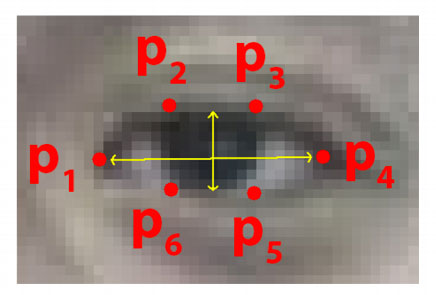

In terms of blink detection, we are only interested in two sets of facial structures — the eyes.

Each eye is represented by 6 (x, y)-coordinates, starting at the left-corner of the eye (as if you were looking at the person), and then working clockwise around the remainder of the region:

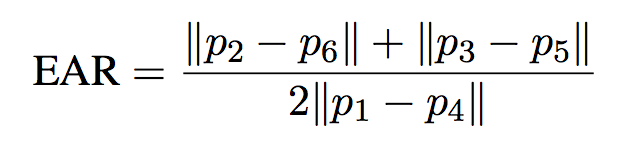

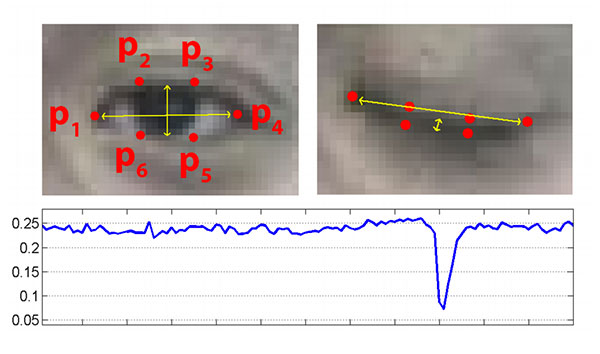

In [2]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import imutils
import time
import dlib
import cv2

In [3]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
 
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = dist.euclidean(eye[0], eye[3])
 
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
 
	# return the eye aspect ratio
	return ear

In [1]:
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 4
 
# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

In [7]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('facial-landmarks/face_landmarks.dat')

[INFO] loading facial landmark predictor...


In [8]:
# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [2]:
# start the video stream thread
print("[INFO] starting webcam...")
vs = VideoStream(src=0).start()
time.sleep(1.0)
# loop over frames from the video stream
while True:
	# if this is a file video stream, then we need to check if
	# there any more frames left in the buffer to process
	#if fileStream and not vs.more():
		#break
 
	# grab the frame from the threaded video file stream, resize
	# it, and convert it to grayscale
	# channels)
	frame = vs.read()
	frame = imutils.resize(frame, width=450)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
	# detect faces in the grayscale frame
	rects = detector(gray, 0)
    	# loop over the face detections
	for rect in rects:
		# determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)
 
		# extract the left and right eye coordinates, then use the
		# coordinates to compute the eye aspect ratio for both eyes
		leftEye = shape[lStart:lEnd]
		rightEye = shape[rStart:rEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
 
		# average the eye aspect ratio together for both eyes
		ear = (leftEAR + rightEAR) / 2.0
        # compute the convex hull for the left and right eye, then
		# visualize each of the eyes
		leftEyeHull = cv2.convexHull(leftEye)
		rightEyeHull = cv2.convexHull(rightEye)
		cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
		cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        # check to see if the eye aspect ratio is below the blink
		# threshold, and if so, increment the blink frame counter
		if ear < EYE_AR_THRESH:
			COUNTER += 1
 
		# otherwise, the eye aspect ratio is not below the blink
		# threshold
		else:
			# if the eyes were closed for a sufficient number of
			# then increment the total number of blinks
			if COUNTER >= EYE_AR_CONSEC_FRAMES:
				TOTAL += 1
 
			# reset the eye frame counter
			COUNTER = 0
        # draw the total number of blinks on the frame along with
		# the computed eye aspect ratio for the frame
		cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
			cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
		cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
			cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
	# show the frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
 
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] starting webcam...


NameError: name 'VideoStream' is not defined

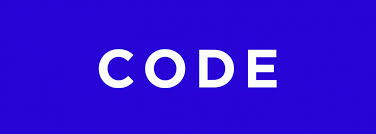

In [1]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
 
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = dist.euclidean(eye[0], eye[3])
 
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
 
	# return the eye aspect ratio
	return ear

In [4]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import imutils
import time
import dlib
import cv2


EYE_AR_THRESH = 0.31
EYE_AR_CONSEC_FRAMES = 6
 
# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0


print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('facial-landmarks/face_landmarks.dat')

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

# start the video stream thread
print("[INFO] starting webcam...")
vs = VideoStream(src=0).start()
time.sleep(1.0)
# loop over frames from the video stream
while True:
	# if this is a file video stream, then we need to check if
	# there any more frames left in the buffer to process
	#if fileStream and not vs.more():
		#break
 
	# grab the frame from the threaded video file stream, resize
	# it, and convert it to grayscale
	# channels)
	frame = vs.read()
	frame = imutils.resize(frame, width=450)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
	# detect faces in the grayscale frame
	rects = detector(gray, 0)
    	# loop over the face detections
	for rect in rects:
		# determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)
 
		# extract the left and right eye coordinates, then use the
		# coordinates to compute the eye aspect ratio for both eyes
		leftEye = shape[lStart:lEnd]
		rightEye = shape[rStart:rEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
 
		# average the eye aspect ratio together for both eyes
		ear = (leftEAR + rightEAR) / 2.0
        # compute the convex hull for the left and right eye, then
		# visualize each of the eyes
		leftEyeHull = cv2.convexHull(leftEye)
		rightEyeHull = cv2.convexHull(rightEye)
		cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
		cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        # check to see if the eye aspect ratio is below the blink
		# threshold, and if so, increment the blink frame counter
		if ear < EYE_AR_THRESH:
			COUNTER += 1
 
		# otherwise, the eye aspect ratio is not below the blink
		# threshold
		else:
			# if the eyes were closed for a sufficient number of
			# then increment the total number of blinks
			if COUNTER >= EYE_AR_CONSEC_FRAMES:
				TOTAL += 1
 
			# reset the eye frame counter
			COUNTER = 0
        # draw the total number of blinks on the frame along with
		# the computed eye aspect ratio for the frame
		cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
			cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
		cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
			cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
	# show the frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
 
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] loading facial landmark predictor...
[INFO] starting webcam...
